# TUGAS 1 Computer Vision
# About Tugas
Nama : Khairul Umam Albi <br>
NPM  : 2008107010072

In [1]:
#Berikut ini adalah code untuk menampilkan video live stream dari kamera 
#framenya diperkecil menjadi setengahnya
#untuk menutup frame, klik key 'q'

import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
#Berikut ini merupakan code yang menampilkan video live stream dari kamera
#kemudian anda dapat menggunakan mouse input dan membuat persegi di mana
#gambar pada persegi akan diubah menjadi citra negatif

import cv2
import numpy as np

def draw_rectangle(event, x, y, flags, params):
    global x_init, y_init, drawing, top_left_pt, bottom_right_pt
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_init, y_init = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            top_left_pt = (min(x_init, x), min(y_init, y))
            bottom_right_pt = (max(x_init, x), max(y_init, y))
            img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x] #proses mengubah jadi negatif
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        top_left_pt = (min(x_init, x), min(y_init, y))
        bottom_right_pt = (max(x_init, x), max(y_init, y))
        img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x] #proses mengubah jadi negatif

if __name__=='__main__':
    drawing = False
    top_left_pt, bottom_right_pt = (-1,-1), (-1,-1)
    
    cap = cv2.VideoCapture(0)
    
    # Check if the webcam is opened correctly
    if not cap.isOpened():
        raise IOError("Cannot open webcam")
        
    cv2.namedWindow('Webcam')
    cv2.setMouseCallback('Webcam', draw_rectangle)
    
    while True:
        ret, frame = cap.read()
        img = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        
        (x0,y0), (x1,y1) = top_left_pt, bottom_right_pt
        img[y0:y1, x0:x1] = 255 - img[y0:y1, x0:x1]
        
        cv2.imshow('Webcam', img)
        
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Text(0.5, 1.0, 'Filter Pelaku Perang Dunia Shinobi ke-4')

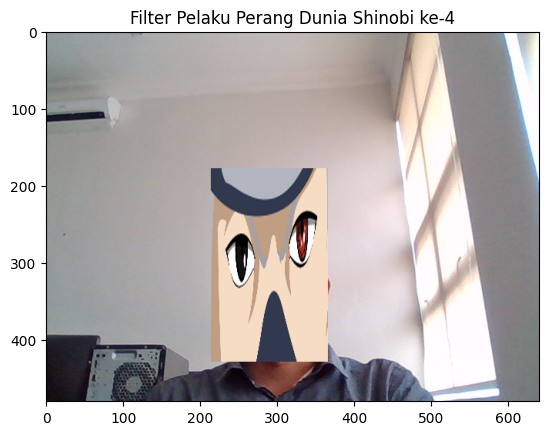

In [18]:
#Tugasnya
#Silakan anda bereksperimen dengan bagian persegi yang dipilih pada video live stream dari camera
#Jika pada contoh bagian persegi diubah menjadi negatif,
#maka pada tugas ini, anda bisa berkreasi, seperti mengubah warna, apply filter seperti blur,
#gaussianblur, medianblur, atau menampilkan efek lainnya

#atau anda bisa berkreasi pada keseluruhan gambar dengan menambah facemask, kumis, 
#telinga kucing atau lainnya

import numpy as np
import cv2
from matplotlib import pyplot as plt 

#Memanggil Cascade untuk mendeteksi wajah
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#Mengimport gambar topeng kucing(untuk dijadikan filter ketika camera mendeteksi wajah)
img_topeng_mugiwara = cv2.imread('gambar/kaka1.png', -1)

#Mengatur kondisi jika webcam terbuka
isWebcamOpen = True

#Mencapture video dari webcam
capture = cv2.VideoCapture(0) 
capture.set(cv2.CAP_PROP_FPS, 30)

#Function untuk menset ukuran dan tata letak filter terhadap gambar
def setFilter(source, overlay, posisi=(0, 0)):
    overlay = cv2.resize(overlay, (0, 0), fx=1, fy=1)
    tinggi, lebar, _ = overlay.shape  
    baris, kolom, _ = source.shape 
    y, x = posisi[0], posisi[1]
    
    for i in range(tinggi):
        for j in range(lebar):
            if x + i >= baris or y + j >= kolom:
                continue
            alpha = float(overlay[i][j][3] / 255.0)
            source[x + i][y + j] = alpha * overlay[i][j][:3] + (1 - alpha) * source[x + i][y + j]
    return source

#Kondisi selama webcam masih membuka
while isWebcamOpen:
    ret, gambar = capture.read()
    gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    wajah = cascade.detectMultiScale(gambar, 1.2, 5, 0, (120, 120), (350, 350))
    
    for (x, y, lebar, tinggi) in wajah:
        if tinggi > 0 and lebar > 0:
            
            #Mengatur posisi filter terhadap wajah
            position_min = int(y + -2.0 * tinggi / 5.5)
            position_max = int(y + 4.5 * tinggi / 3.5)
            topeng_mugiwara_position = position_max - position_min

            #Menerapkan posisi yang sudah diatur di atas terhadap gambar topeng kucing
            source_topeng_mugiwara = gambar[position_min:position_max, x:x + lebar]
            
            #Mencocokkan ukuran filter agar menyesuaikan dengan gerakan wajah
            topeng_mugiwara_overlay = cv2.resize(img_topeng_mugiwara, (lebar, topeng_mugiwara_position), interpolation=cv2.INTER_CUBIC)

            #Menggunakan method setFilter
            setFilter(source_topeng_mugiwara, topeng_mugiwara_overlay)
    
    #Menampilkan windows untuk webcam
    cv2.imshow('Filter Topeng Spiderman', gambar)
    
    #kondisi jika user menutup webcam
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        
        #Menyimpan gambar dari webcam ke galeri
        cv2.imwrite('topeng mugiwara filter.jpg', gambar)
    
        #Menutup webcam
        isWebcamOpen = False
        break
    
capture.release()
cv2.destroyAllWindows()

# Mencetak hasil webcam ke dalam bentuk gambar
plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
plt.title("Filter Pelaku Perang Dunia Shinobi ke-4")